In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import pandas as pd
import re
import scipy as sp
import scipy.stats as stats
from scipy.interpolate import interp1d

from sklearn import linear_model

import stats13tools.stats13tools as st

%matplotlib inline

In [2]:
colors = {"orange": "#f0ad4e",
          "red": "#d9534f",
          "blue": "#5bc0de",
          "green": "#5cb85c",
          "gray": "#636c72",
          "lightgray": "#d2d2d2"
         }

colbrew1 = ["#fbb4ae", "#b3cde3", "#ccebc5", "#decbe4", "#fed9a6",
           "#ffffcc", "#e5d8bd", "#fddaec"]

colbrew2 = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3",
           "#fdb462", "#b3de69", "#fccde5"]

# Ants and Sandwich

In [3]:
data = pd.read_csv("data-Lock5DataCSV/SandwichAnts2.csv")
data

,Butter,Filling,Bread,Ants,Order
0,no,Vegemite,Rye,18,10
1,no,Peanut Butter,Rye,43,26
2,no,Ham & Pickles,Rye,44,39
3,no,Vegemite,Wholemeal,29,25
4,no,Peanut Butter,Wholemeal,59,35
5,no,Ham & Pickles,Wholemeal,34,1
6,no,Vegemite,Multigrain,42,44
7,no,Peanut Butter,Multigrain,22,36
8,no,Ham & Pickles,Multigrain,36,32
9,no,Vegemite,White,42,33


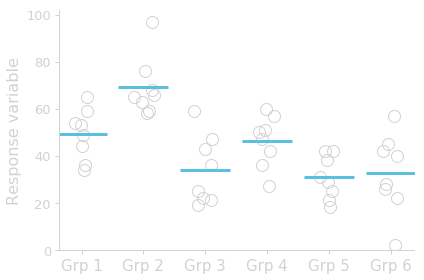

In [128]:
fig, ax1 = plt.subplots(figsize=(6,4))

for ax in [ax1]:
    for i,grp in enumerate(data.groupby(["Filling", "Butter"])["Ants"]):
        ax.plot(np.zeros(len(grp[1]))+i+np.random.randn(len(grp[1]))/10, grp[1], "o", mfc="none", ms=12, mec=colors["lightgray"])
        ax.plot(i, np.mean(grp[1]), "_", ms=50, color=colors["blue"], mew=3)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=15, pad=4)
    ax.set_ylabel("Response variable", size=16, color=colors["lightgray"], ha="center")
    ax.set_xticks(range(len(data.groupby(["Filling", "Butter"])["Ants"])))
    ax.set_xticklabels([f"Grp {i+1}" for i in range(len(data.groupby(["Filling", "Butter"])["Ants"]))])
    #ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(0)

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/multiple-means-ex.svg", transparent=True)

In [120]:
#[g[1] for g in data.groupby(["Filling", "Butter"])["Ants"]]

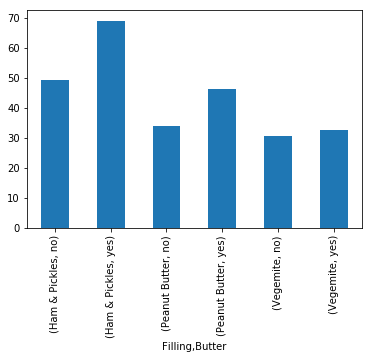

In [4]:
data.groupby(["Filling", "Butter"])["Ants"]#.mean().plot.bar()

In [129]:
# We're studying only part of the data
data_clean = [gp[1].values for gp in data[data.Butter=="no"].groupby("Filling")["Ants"]]
data_clean_label = [gp[0] for gp in data[data.Butter=="no"].groupby("Filling")["Ants"]]

#reorder the data
data_clean[0], data_clean[2] = data_clean[2], data_clean[0]
data_clean_label[0], data_clean_label[2] = data_clean_label[2], data_clean_label[0]

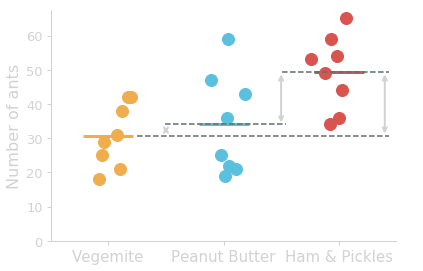

In [132]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.8, 0.8])
ax2 = ax1.twinx()

for ax in [ax1]:
    for (i,grp),color in zip(enumerate(data_clean), ["orange", "blue", "red"]):
        ax.plot(np.zeros(len(grp))+i+np.random.randn(len(grp))/10, grp, "o",  ms=12, color=colors[color])
        ax.plot(i, np.mean(grp), "_", ms=50, color=colors[color], mew=3)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=15, pad=4)
    ax.set_ylabel("Number of ants", size=16, color=colors["lightgray"], ha="center")
    ax.set_xticks(range(3))
    ax.set_xticklabels((data_clean_label))
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(0)
    
for ax in [ax2]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    ax.annotate(s='', xy=(0.5,np.mean(data_clean[0])), xytext=(0.5,np.mean(data_clean[1])), 
             arrowprops=dict(arrowstyle='<->', color=colors["lightgray"],
                            linewidth=2))
    ax.annotate(s='', xy=(1.5,np.mean(data_clean[1])), xytext=(1.5,np.mean(data_clean[2])), 
             arrowprops=dict(arrowstyle='<->', color=colors["lightgray"],
                            linewidth=2))
    ax.annotate(s='', xy=(2.4,np.mean(data_clean[0])), xytext=(2.4,np.mean(data_clean[2])), 
             arrowprops=dict(arrowstyle='<->', color=colors["lightgray"],
                            linewidth=2))
    ax.axhline(np.mean(data_clean[0]), xmin=0.25, xmax=0.98, ls="--", color=colors["gray"])
    ax.axhline(np.mean(data_clean[1]), xmin=0.33, xmax=0.68, ls="--", color=colors["gray"])
    ax.axhline(np.mean(data_clean[2]), xmin=0.67, xmax=0.98, ls="--", color=colors["gray"])

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ants-sandwich-dotplot.svg", transparent=True)

# MAD

In [39]:
def mad(data):
    data = np.ravel(data)
    return np.sum(np.abs(np.roll(data, 1)-data))/len(data)

original_mad = mad([np.mean(grp) for grp in data_clean])
original_mad

12.333333333333334

In [40]:
population = np.concatenate(data_clean)

n_simul=10000
res_mad = np.zeros(n_simul)

for i in range(n_simul):
    np.random.shuffle(population)
    samples = [population[8*i:8*(i+1)] for i in range(3)]
    res_mad[i] = mad([np.mean(g) for g in samples])

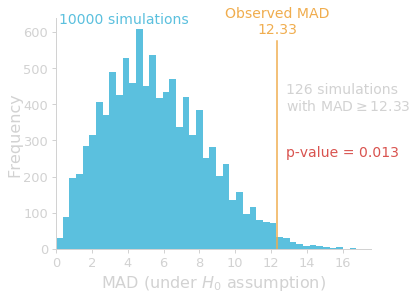

In [43]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.13, 0.15, 0.73, 0.8])
ax2 = ax1.twinx()
ax3 = ax1.twinx()

for ax in [ax1]:
    ax.hist(res_mad, bins="auto", color=colors["blue"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("MAD (under $H_0$ assumption)", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"], ha="center", labelpad=1)
    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.text(ax.get_xlim()[1]*0.01, ax.get_ylim()[1]*0.98, "10000 simulations",
            color=colors["blue"], size=14)
    
for ax in [ax2]:
    ax.axis("off")
    ax.axvline(original_mad, color=colors["orange"], ymax=0.9)
    ax.text(original_mad, ax.get_ylim()[1]*0.92, f'Observed MAD\n{original_mad:.2f}', ha="center",
        color=colors["orange"], size=14, va="bottom")
        
for ax in [ax3]:
    ax.axis("off")
    n_above = np.sum(res_mad>original_mad)
    ax.text(original_mad+0.5, ax.get_ylim()[1]*0.6, f"{n_above} simulations\nwith MAD$\geq${original_mad:.2f}",
            color=colors["lightgray"], size=14)
    ax.text(original_mad+0.5, ax.get_ylim()[1]*0.4, f"p-value = {n_above/10000:.3f}",
            color=colors["red"], size=14)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ants-sandwich-simulation-mad.svg", transparent=True)

In [46]:
pairs = [[0, 1], [0, 2], [1, 2]]

for pair in pairs:
    mean1 = np.mean(data_clean[pair[0]])
    mean2 = np.mean(data_clean[pair[1]])
    original_diff = mean1 - mean2

    res_diff = np.zeros(10000)

    for i in range(10000):
        pseudo1 = np.random.choice(data_clean[pair[0]], size=len(data_clean[pair[0]]))
        pseudo2 = np.random.choice(data_clean[pair[1]], size=len(data_clean[pair[0]]))
        res_diff[i] = np.mean(pseudo1)-np.mean(pseudo2)
    
    ci95 = np.percentile(res_diff, [2.5, 97.5])
    print(f"{data_clean_label[pair[0]]} vs {data_clean_label[pair[1]]}:")
    print(f" {mean1} - {mean2} = {original_diff:.3f}")
    print(f" 95% CIs = [{ci95[0]:.3f}, {ci95[1]:.3f}]")

#np.percentile(res_diff, [2.5, 97.5])

Vegemite vs Peanut Butter:
 30.75 - 34.0 = -3.250
 95% CIs = [-14.750, 7.500]
Vegemite vs Ham & Pickles:
 30.75 - 49.25 = -18.500
 95% CIs = [-27.500, -9.375]
Peanut Butter vs Ham & Pickles:
 34.0 - 49.25 = -15.250
 95% CIs = [-26.750, -3.000]


# Total variability

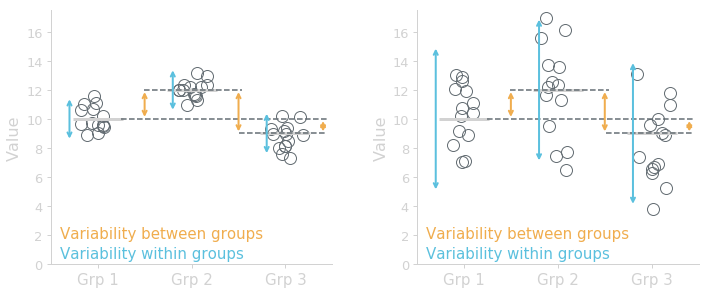

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

ax3 = ax1.twinx()
ax4 = ax2.twinx()
ax5 = ax1.twinx()
ax6 = ax2.twinx()


dataset_small = [stats.norm(m, scale=s).rvs(14) for m,s in [[10,0.7], [12,0.7], [9,0.7]]]
dataset_big = [stats.norm(m, scale=s).rvs(14) for m,s in [[10,2.5], [12,2.5], [9,2.5]]]
dset = [10, 12, 9]

for ax in [ax1]:
    for (i,grp),color in zip(enumerate(dataset_small), ["gray", "gray", "gray"]):
        ax.plot(np.zeros(len(grp))+i+np.random.randn(len(grp))/10, grp, "o", mfc="none", ms=12, mec=colors[color])
        ax.plot(i, dset[i], "_", ms=50, color=colors["lightgray"], mew=3)

for ax in [ax2]:
    for (i,grp),color in zip(enumerate(dataset_big), ["gray", "gray", "gray"]):
        ax.plot(np.zeros(len(grp))+i+np.random.randn(len(grp))/10, grp, "o", mfc="none", ms=12, mec=colors[color])
        ax.plot(i, dset[i], "_", ms=50, color=colors["lightgray"], mew=3)

for ax in [ax1, ax2]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=15, pad=4)
    ax.set_ylabel("Value", size=16, color=colors["lightgray"], ha="center")
    ax.set_xticks(range(3))
    ax.set_xticklabels(["Grp 1", "Grp 2", "Grp 3"])
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(0, 17.5)

for ax in [ax3, ax4]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[0]+0.1, ax.get_ylim()[1]*0.15, "Variability between groups", color=colors["orange"],
            size=15, ha="left", va="top")
    ax.annotate(s='', xy=(0.5,np.mean(dset[0])), xytext=(0.5,np.mean(dset[1])), 
             arrowprops=dict(arrowstyle='<->', color=colors["orange"],
                            linewidth=2))
    ax.annotate(s='', xy=(1.5,np.mean(dset[1])), xytext=(1.5,np.mean(dset[2])), 
             arrowprops=dict(arrowstyle='<->', color=colors["orange"],
                            linewidth=2))
    ax.annotate(s='', xy=(2.4,np.mean(dset[0])), xytext=(2.4,np.mean(dset[2])), 
             arrowprops=dict(arrowstyle='<->', color=colors["orange"],
                            linewidth=2))
    ax.axhline(np.mean(dset[0]), xmin=0.25, xmax=0.98, ls="--", color=colors["gray"])
    ax.axhline(np.mean(dset[1]), xmin=0.33, xmax=0.68, ls="--", color=colors["gray"])
    ax.axhline(np.mean(dset[2]), xmin=0.67, xmax=0.98, ls="--", color=colors["gray"])
    
for ax in [ax5, ax6]:
    ax.axis("off")
    if ax==ax5:
        size = 1.5
    elif ax==ax6:
        size=5
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[0]+0.1, ax.get_ylim()[1]*0.07, "Variability within groups", color=colors["blue"],
            size=15, ha="left", va="top")
    ax.annotate(s='', xy=(-0.3,dset[0]-size), xytext=(-0.3,dset[0]+size), 
             arrowprops=dict(arrowstyle='<->', color=colors["blue"],
                            linewidth=2))
    ax.annotate(s='', xy=(0.8,dset[1]-size), xytext=(0.8,dset[1]+size), 
             arrowprops=dict(arrowstyle='<->', color=colors["blue"],
                            linewidth=2))
    ax.annotate(s='', xy=(1.8,dset[2]-size), xytext=(1.8,dset[2]+size), 
             arrowprops=dict(arrowstyle='<->', color=colors["blue"],
                            linewidth=2))
        
plt.subplots_adjust(left=0.08, bottom=0.1, right=0.98, top=0.98,
                wspace=0.3, hspace=None)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/total-variability-ex.svg", transparent=True)

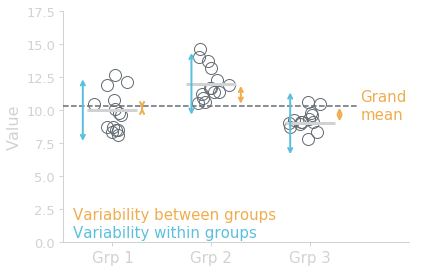

In [103]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.8, 0.8])

ax2 = ax1.twinx()
ax3 = ax1.twinx()


dataset_small = [stats.norm(m, scale=s).rvs(14) for m,s in [[10,1], [12,1], [9,1]]]
dset = [10, 12, 9]

for ax in [ax1]:
    for (i,grp),color in zip(enumerate(dataset_small), ["gray", "gray", "gray"]):
        ax.plot(np.zeros(len(grp))+i+np.random.randn(len(grp))/10, grp, "o", mfc="none", ms=12, mec=colors[color])
        ax.plot(i, dset[i], "_", ms=50, color=colors["lightgray"], mew=3)

for ax in [ax1]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=15, pad=4)
    ax.set_ylabel("Value", size=16, color=colors["lightgray"], ha="center")
    ax.set_xticks(range(3))
    ax.set_xticklabels(["Grp 1", "Grp 2", "Grp 3"])
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(0, 17.5)

for ax in [ax2]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    ax.axhline(np.mean(dset), xmax=0.85, color=colors["gray"], ls="--")
    
    ax.text(ax.get_xlim()[0]+0.1, ax.get_ylim()[1]*0.15, "Variability between groups", color=colors["orange"],
            size=15, ha="left", va="top")
    ax.annotate(s='', xy=(0.3,dset[0]), xytext=(0.3,np.mean(dset)), 
             arrowprops=dict(arrowstyle='<->', color=colors["orange"],
                            linewidth=2))
    ax.annotate(s='', xy=(1.3,dset[1]), xytext=(1.3,np.mean(dset)), 
             arrowprops=dict(arrowstyle='<->', color=colors["orange"],
                            linewidth=2))
    ax.annotate(s='', xy=(2.3,dset[2]), xytext=(2.3,np.mean(dset)), 
             arrowprops=dict(arrowstyle='<->', color=colors["orange"],
                            linewidth=2))
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.86, np.mean(dset), "Grand\nmean", color=colors["orange"],
            size=15, ha="left", va="center")
    
for ax in [ax3]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    size=2.5
    ax.text(ax.get_xlim()[0]+0.1, ax.get_ylim()[1]*0.07, "Variability within groups", color=colors["blue"],
            size=15, ha="left", va="top")
    ax.annotate(s='', xy=(-0.3,dset[0]-size), xytext=(-0.3,dset[0]+size), 
             arrowprops=dict(arrowstyle='<->', color=colors["blue"],
                            linewidth=2))
    ax.annotate(s='', xy=(0.8,dset[1]-size), xytext=(0.8,dset[1]+size), 
             arrowprops=dict(arrowstyle='<->', color=colors["blue"],
                            linewidth=2))
    ax.annotate(s='', xy=(1.8,dset[2]-size), xytext=(1.8,dset[2]+size), 
             arrowprops=dict(arrowstyle='<->', color=colors["blue"],
                            linewidth=2))
        
#plt.subplots_adjust(left=0.08, bottom=0.1, right=0.98, top=0.98,
#                wspace=0.3, hspace=None)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/total-variability-sum-of-squares.svg", transparent=True)

# F-statistic

In [104]:
def f_stat(data):
    gpMeans = np.array([np.mean(gp) for gp in data])
    gpSizes = np.array([len(gp) for gp in data])
    gpStd = np.array([np.std(gp, ddof=1) for gp in data])
    grandMean = gpMeans.mean()
    overallSampleSize = len(np.ravel(data))
    nGroups = len(data)
    SSG = np.sum(gpSizes*(gpMeans-grandMean)**2)/(nGroups-1)
    SSE = np.sum(((gpSizes-1)*gpStd**2)/(overallSampleSize-nGroups))
    return SSG/SSE

original_f = f_stat(data_clean)
original_f

5.6266735324407824

In [105]:
original_f == stats.f_oneway(data_clean[0], data_clean[1], data_clean[2])[0]

True

In [112]:
print(f_stat([[47,49,22,42,31,65,38,25], [53,34,43,21,21,59,54,25], [18,19,44,36,42,29,36,59]]))

print(f_stat([[44,29,36,36,43,42,19,25], 
        [59,25,18,34,47,53,31,21], [22,21,49,65,42,59,54,38]]))

0.21005984611
1.05645756458


In [106]:
population = np.concatenate(data_clean)

n_simul=10000
res_f = np.zeros(n_simul)

for i in range(n_simul):
    np.random.shuffle(population)
    samples = [population[8*i:8*(i+1)] for i in range(3)]
    res_f[i] = f_stat(samples)

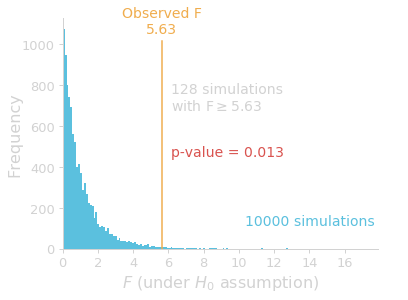

In [115]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.13, 0.15, 0.73, 0.8])
ax2 = ax1.twinx()
ax3 = ax1.twinx()

for ax in [ax1]:
    ax.hist(res_f, bins="auto", color=colors["blue"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("$F$ (under $H_0$ assumption)", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"], ha="center", labelpad=-0.5)
    ax.set_ylim(0)
    ax.set_xlim(0, 17.9)
    ax.text(ax.get_xlim()[1]*0.99, ax.get_ylim()[1]*0.1, "10000 simulations",
            color=colors["blue"], ha="right", size=14)
    
for ax in [ax2]:
    ax.axis("off")
    ax.axvline(original_f, color=colors["orange"], ymax=0.9)
    ax.text(original_f, ax.get_ylim()[1]*0.92, f'Observed F\n{original_f:.2f}', ha="center",
        color=colors["orange"], size=14, va="bottom")
        
for ax in [ax3]:
    ax.axis("off")
    n_above = np.sum(res_f>original_f)
    ax.text(original_f+0.5, ax.get_ylim()[1]*0.6, f"{n_above} simulations\nwith F$\geq${original_f:.2f}",
            color=colors["lightgray"], size=14)
    ax.text(original_f+0.5, ax.get_ylim()[1]*0.4, f"p-value = {n_above/10000:.3f}",
            color=colors["red"], size=14)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ants-sandwich-simulation-fstat.svg", transparent=True)

# Theory

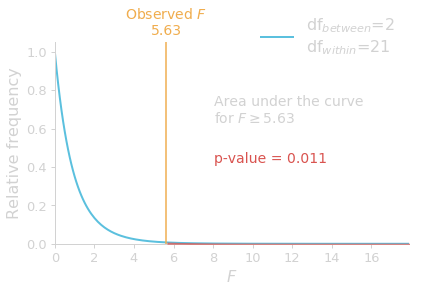

In [193]:
df1 = len(data_clean)-1
df2 = len(np.ravel(data_clean))-len(data_clean)
f_dist = stats.f(df1, df2)

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.82, 0.7])
ax2 = ax1.twinx()

for ax in [ax1]:
    x = np.linspace(0.000000001, 25, 300)
    ax.plot(x, f_dist.pdf(x), lw=2, alpha=1, color=colors["blue"], label=f"df$_{{between}}$={df1}\ndf$_{{within}}$={df2}")
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("$F$", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Relative frequency", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(0)
    ax.set_xlim(0, 17.9)
    legend = ax.legend(loc="upper right", bbox_to_anchor=(1, 1.2), frameon=False, fontsize=16)
    for text in legend.get_texts():
        text.set_color(colors["lightgray"])
    
for ax in [ax2]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    pvalue = f_dist.sf(original_f)
    ax.axvline(original_f, color=colors["orange"], ymax=1)
    ax.text(original_f, ax.get_ylim()[1]*1.02, f'Observed $F$\n{original_f:.2f}', ha="center",
        color=colors["orange"], size=14, va="bottom")
    ax.text(ax.get_xlim()[1]*0.45, ax.get_ylim()[1]*0.6, f"Area under the curve\nfor $F\geq${original_f:.2f}",
            color=colors["lightgray"], size=14)
    ax.text(ax.get_xlim()[1]*0.45, ax.get_ylim()[1]*0.4, f"p-value = {pvalue:.3f}",
            color=colors["red"], size=14)
    ax.fill_between(x[x>original_f], f_dist.pdf(x)[x>original_f], color=colors["red"], alpha=0.6)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ants-sandwich-theory-f.svg", transparent=True)

In [37]:
mad([34.25, 36, 43.75])

6.333333333333333